# [0] [Total3D pickles] layout_emitter + 3D lighting

In [8]:
# borrowed from Total3D repo -> notebooks/parse_OR_labels-lighting-reindexed%2Bassigned-V4.ipynb
import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train')

import os
import json

%reload_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib widget

# dataset = 'sunrgbd'
dataset = 'OR'

mode = 'val'
# mode = 'train'
# mode = 'train-tmp'

# split_path_dict = {'sunrgbd': 'data/sunrgbd/preprocessed', 'OR': 'utils_OR/openrooms/preprocessed-full'}
split_path_dict = {'sunrgbd': 'data/sunrgbd/preprocessed', 'OR': '/home/ruizhu/Documents/Projects/semanticInverse/train/data/openrooms/list_OR_V4full/list'}

if dataset == 'sunrgbd':
    split_file = os.path.join(split_path_dict[dataset], mode + '.json')
    with open(split_file) as file:
        split = json.load(file)
elif dataset == 'OR':
    split_file = os.path.join(split_path_dict[dataset], mode + '.txt')
    with open(split_file) as f:
        mylist = f.read().splitlines() 
    split = [x.split(' ') for x in mylist]

print(len(split), split[0])

5664 ['scene0509_00', '1', 'mainDiffLight_xml1/scene0509_00/im_1.hdr', 'main_xml1/scene0509_00/imsemLabel_1.npy']


In [9]:
import torch
import numpy as np
from pathlib import Path
from utils.utils_total3D.utils_OR_visualize import format_layout, Box
from utils.utils_total3D.data_config import OR4XCLASSES_dict, NYU40CLASSES
from utils.utils_total3D.utils_others import OR4X_mapping_catInt_to_RGB, OR4X_mapping_catStr_to_RGB
from utils.utils_total3D.utils_OR_vis_labels import read_vis_scene_3d, RGB_to_01
import pickle

OR = 'OR45'
classes = OR4XCLASSES_dict[OR] if dataset == 'OR' else NYU40CLASSES
with open(str(Path('../train/data/openrooms/total3D_colors/') / OR4X_mapping_catInt_to_RGB['light']), 'rb') as f:
    OR_mapping_catInt_to_RGB = pickle.load(f)[OR]
with open(str(Path('../train/data/openrooms/total3D_colors/') / OR4X_mapping_catStr_to_RGB['light']), 'rb') as f:
    OR_mapping_catStr_to_RGB = pickle.load(f)[OR]

import random
image_id = random.randint(0, len(split))
# image_id = 3
pickle_path_ori = split[image_id]

pickle_id = random.randint(0, len(split))
pickle_id = 0
naming = split[pickle_id][2]

# naming = 'main_xml1/scene0552_00/im_1.hdr'
# naming = 'main_xml1/scene0552_00/im_1.hdr'
# naming = 'mainDiffLight_xml1/scene0017_02/im_4.hdr'
# naming = 'mainDiffMat_xml1/scene0695_03/im_26.hdr'
# pickle_path_ori = '/data/ruizhu/OR-V3-OR45_total3D_train_test_data/%06d.pkl'%pickle_id
meta_split = naming.split('/')[0]
scene_name = naming.split('/')[1]
withinsequence_id = int(naming.split('/')[2].split('.')[0].split('_')[1])
pickle_path_ori = '/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data/%s/%s/%s'%(naming.split('/')[0], naming.split('/')[1], naming.split('/')[2].replace('im', 'layout_obj').replace('hdr', 'pkl'))


grid_size = 8

pickle_path = pickle_path_ori.replace('.pkl', '_reindexed.pkl')
pickle_emitters_path = pickle_path_ori.replace('.pkl', '_emitters.pkl')
pickle_emitters_assign_info_list_path = pickle_path_ori.replace('.pkl', '_emitters_assign_info_%dX%d_V4.pkl'%(grid_size, grid_size))

print(pickle_path)

/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data/mainDiffLight_xml1/scene0509_00/layout_obj_1_reindexed.pkl


dict_keys(['rgb_img_path', 'depth_map', 'boxes', 'camera', 'layout', 'scene_name', 'withinsequence_id', 'meta_split', 'meta_name', 'sub_name', 'scene_pickle_file', 'cam_pickle_file', 'frame_pickle_file', 'reindex_info_dict'])
dict_keys(['sequence_name', 'withinsequence_id', 'boxes', 'emitter_random_ids']) scene0509_00 1
dict_keys(['emitter2wall_assign_info_list', 'emitters_obj_list', 'wall_grid_prob', 'cell_prob_mean', 'cell_prob', 'cell_count', 'cell_info_grid', 'wall_params_ori_list'])
[draw_projected_layout] Returned.
[draw_projected_bdb3d] Returned.


/home/ruizhu/anaconda3/envs/py38/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


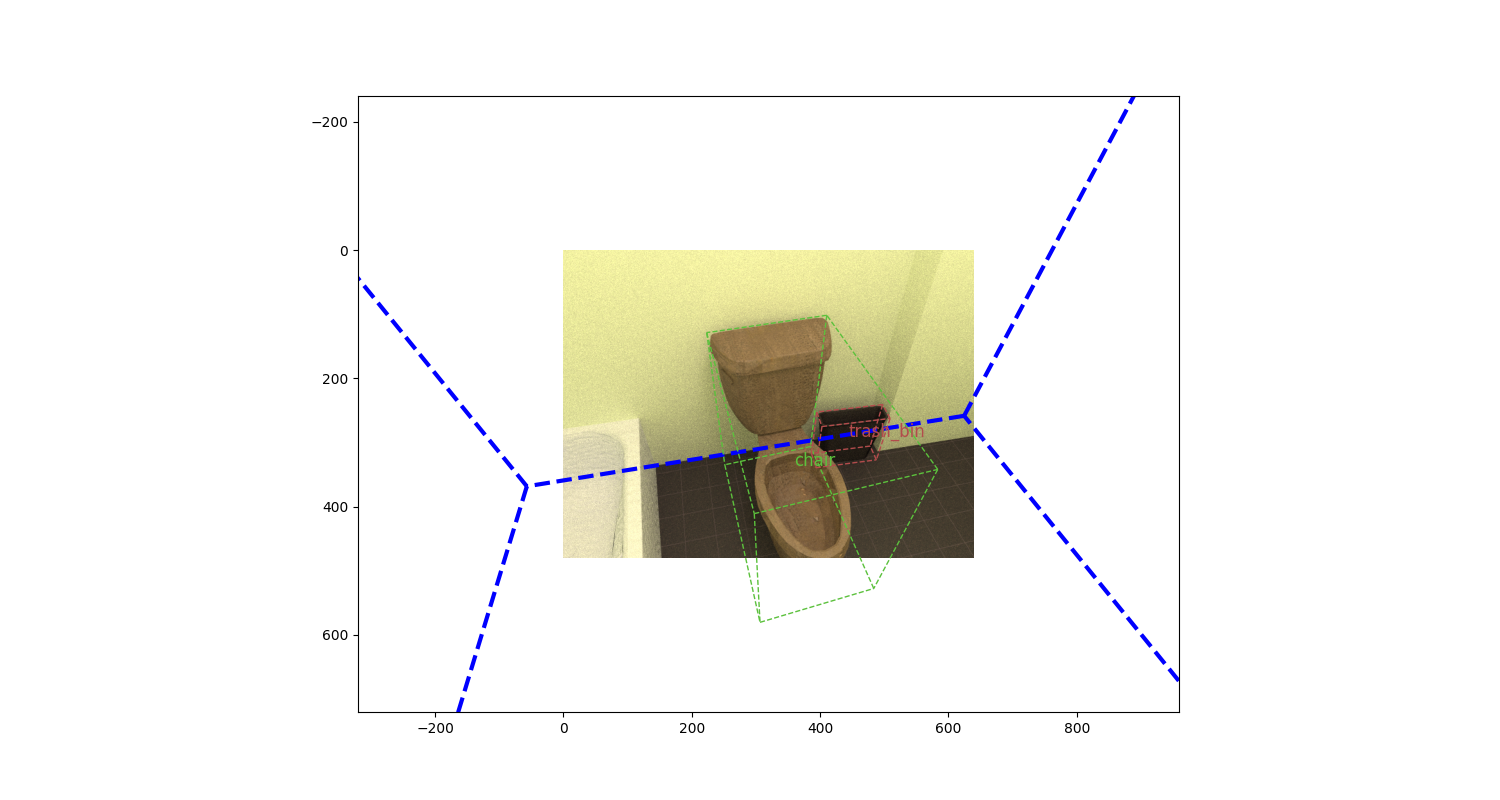

In [10]:
import pickle
with open(pickle_path, 'rb') as f:
    sequence = pickle.load(f)
print(sequence.keys())

with open(pickle_emitters_path, 'rb') as f:
    sequence_emitters = pickle.load(f)
print(sequence_emitters.keys(), sequence_emitters['sequence_name'], sequence_emitters['withinsequence_id'])
with open(pickle_emitters_assign_info_list_path, 'rb') as f:
    sequence_emitter2wall_assign_info_dict = pickle.load(f)
print(sequence_emitter2wall_assign_info_dict.keys())

import pickle5 as pickle
emitter_representation_type = '0ambient'
emitters_prop_dict_representation_dict_path = pickle_path.replace('layout_obj', ('emitters_prop_dict_%s'%emitter_representation_type)).replace('_reindexed', '')
with open(emitters_prop_dict_representation_dict_path, 'rb') as f:
    emitters_prop_dict_representation_dict = pickle.load(f)

# transform_to_total3d_coords_dict = {'transform_R': frame.transform_R, 'transform_t': frame.transform_t}
train_test_data_path = '/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data'
transform_to_total3d_coords_dict_path = Path(train_test_data_path) / meta_split / scene_name / ('transform_to_total3d_coords_dict_%d.pkl'%withinsequence_id)
import pickle5 as pickle
with open(transform_to_total3d_coords_dict_path, 'rb') as f:
    transform_to_total3d_coords_dict = pickle.load(f)
    
RAW_data_path = '/newfoundland2/ruizhu/siggraphasia20dataset/layout_labels_V4full-detachEmitterRERE/'
emitter_dict_pickle_file = Path(RAW_data_path) / meta_split / scene_name / ('emitter_dict_%s_%d.pickle'%('0ambient', withinsequence_id))
with open(emitter_dict_pickle_file, "rb") as f:
    emitter_dict_RAW = pickle.load(f)


%matplotlib widget

gt_boxes_list = [format_layout(x) for x in sequence['boxes']['bdb3D']]
for x, class_id in zip(gt_boxes_list, sequence['boxes']['size_cls']):
    x.update({'class_id': class_id})
gt_boxes_dict = {}
for key in list(gt_boxes_list[0].keys()):
    gt_boxes_dict[key] = [x[key] for x in gt_boxes_list]
gt_boxes_dict['random_id'] = [x['random_id'] for x in sequence['boxes']['bdb2D_full']]
gt_boxes_dict['if_valid'] = [True]*sequence['boxes']['bdb2D_full'].shape[0]

    
gt_layout = sequence['layout']

from utils.utils_total3D.data_config import Dataset_Config
from utils.utils_total3D.utils_OR_layout import to_dict_tensor

from utils.utils_total3D.utils_OR_cam import get_rotation_matrix_gt

OR = 'OR45'
dataset_config = Dataset_Config(dataset, OR=OR, version='V3', paths={'total3D_lists_path': '../train/data/openrooms/list_OR_V4full', 'layout_emitter_path': '/data/ruizhu/OR-V4full-OR45_total3D_train_test_data'})
bins_tensor = to_dict_tensor(dataset_config.bins, if_cuda=False)
cam_R_gt = get_rotation_matrix_gt(bins_tensor,
                                  torch.zeros([1]).long()+sequence['camera']['pitch_cls'], torch.zeros([1])+sequence['camera']['pitch_reg'],
                                  torch.zeros([1]).long()+sequence['camera']['roll_cls'], torch.zeros([1])+sequence['camera']['roll_reg']).squeeze().numpy()

# ======== emitters_list
emitters_obj_list = []
for x in range(sequence_emitters['boxes']['bdb3D'].shape[0]):
    obj_dict_new = {'obj_box_3d': sequence_emitters['boxes']['bdb3D_emitter_part'][x], \
                    'random_id': sequence_emitters['boxes']['random_id'][x], \
                    'emitter_prop': sequence_emitters['boxes']['emitter_prop'][x], \
                    'bdb3D_emitter_part': sequence_emitters['boxes']['bdb3D_emitter_part'][x], \
                    'cat_id': sequence_emitters['boxes']['size_cls'][x], \
                    'cat_name': classes[sequence_emitters['boxes']['size_cls'][x]], 'cat_color': RGB_to_01(OR_mapping_catInt_to_RGB[sequence_emitters['boxes']['size_cls'][x]])}
    obj_random_id = sequence_emitters['boxes']['random_id'][x]
    emitter_prop_total3d = emitters_prop_dict_representation_dict[obj_random_id]['emitter_prop_total3d']
    if sequence_emitters['boxes']['emitter_prop'][x]['obj_type'] == 'window' and sequence_emitters['boxes']['emitter_prop'][x]['if_lit_up']:
        print('---', sequence_emitters['boxes']['emitter_prop'][x], emitter_prop_total3d.keys())
        light_center_world_total3d = emitter_prop_total3d['light_center_world_total3d'].reshape(3, 1)
        light_axis_world_total3d = emitter_prop_total3d['light_axis_world_total3d'].reshape(3, 1)
    else:
        light_center_world_total3d = np.zeros((3, 1), dtype=np.float32)
        light_axis_world_total3d = np.zeros((3, 1), dtype=np.float32)
    obj_dict_new['light_world_total3d_centeraxis'] = [light_center_world_total3d, light_axis_world_total3d]
    
    obj_dict_new['emitter_prop'].update({'emitter_rgb_float': emitter_prop_total3d['intensity']})

    emitters_obj_list.append(obj_dict_new)
    
emitter2wall_assign_info_list = sequence_emitter2wall_assign_info_dict['emitter2wall_assign_info_list']
cell_info_grid_GT_includeempty = sequence_emitter2wall_assign_info_dict['cell_info_grid']
cell_info_grid_GT = []
for wall_idx in range(6):
    for i in range(grid_size):
        for j in range(grid_size):
            cell_info = cell_info_grid_GT_includeempty[wall_idx * grid_size**2 + i * grid_size + j]
            if cell_info['obj_type'] is None:
                continue
            cell_info['wallidx_i_j'] = (wall_idx, i, j)
            cell_info_grid_GT.append(cell_info)
                
            obj_random_id = cell_info['emitter_info']['random_id']
            emitter_prop_total3d = emitters_prop_dict_representation_dict[obj_random_id]['emitter_prop_total3d']


#             cell_intensity = np.array([emitter_prop_total3d['intensity_scale'] * x * 255. for x in emitter_prop_total3d['intensity_scaled']]) # intensity_scaled: [0., 1.]
            cell_intensity = np.array(emitter_prop_total3d['intensity'])
            cell_info['emitter_info']['intensity_scalelog'] = np.log(np.clip(np.linalg.norm(cell_intensity.flatten()) + 1., 1., np.inf))
            cell_info['emitter_info']['intensity'] = emitter_prop_total3d['intensity']
            # print(cell_intensity[wall_idx, i, j], cell_info['emitter_info']['intensity'])
#             cell_info['emitter_info']['intensity_scale'] = emitter_prop_total3d['intensity_scale']
#             cell_info['emitter_info']['intensity_scaled'] = emitter_prop_total3d['intensity_scaled']
            intensity_scale255 = max(cell_info['emitter_info']['intensity']) / 255.
            intensity_scaled01 = [np.clip(x / (intensity_scale255+1e-5) / 255., 0., 1.) for x in cell_info['emitter_info']['intensity']]
            cell_info['emitter_info']['intensity_scale255'] = intensity_scale255
            cell_info['emitter_info']['intensity_scaled01'] = intensity_scaled01


            # other representation-specific params
            if cell_info['obj_type'] == 'window':
                cell_info['emitter_info']['lamb'] = emitter_prop_total3d['lamb']
                cell_info['emitter_info']['light_dir_abs'] = emitter_prop_total3d['light_axis_world_total3d'].reshape(3,)
                if emitter_representation_type in ['1ambient']:
                    cell_info['emitter_info']['ambient'] = emitter_prop_total3d['ambient']
                if emitter_representation_type in ['2ambient']:
                    cell_info['emitter_info']['ambientL'] = emitter_prop_total3d['ambientL']
                    cell_info['emitter_info']['ambientR'] = emitter_prop_total3d['ambientR']

grid_prob = sequence_emitter2wall_assign_info_dict['wall_grid_prob'].reshape(6, -1)
import imageio
rgb_img = imageio.imread(sequence['rgb_img_path'])

scene_box = Box(rgb_img, sequence['camera']['K'], cam_R_gt, None, gt_layout, None, gt_boxes_dict, None, None, None, dataset=dataset, OR='OR45', \
                emitters_obj_list_gt=emitters_obj_list, emitter2wall_assign_info_list_gt=emitter2wall_assign_info_list, \
                emitter_cls_prob_PRED=np.random.random((6, grid_size**2)), emitter_cls_prob_GT=grid_prob, cell_info_grid_GT=cell_info_grid_GT, grid_size=grid_size, \
                paths={'color_file': '../train/data/openrooms/total3D_colors/OR4X_mapping_catInt_to_RGB_light.pkl'})

plt.figure(figsize=(15, 8))
ax_2d = plt.gca()
if_use_plt=True
img_map, _ = scene_box.draw_projected_layout('GT', return_plt=True, if_save=False, save_path='', if_use_plt=if_use_plt, fig_or_ax=ax_2d)
img_map2 = scene_box.draw_projected_bdb3d('GT', return_plt=True, if_save=False, save_path='', if_use_plt=if_use_plt, fig_or_ax=ax_2d)
# plt.show()

/home/ruizhu/Documents/Projects/semanticInverse/train/utils/utils_total3D/utils_rui.py:88: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


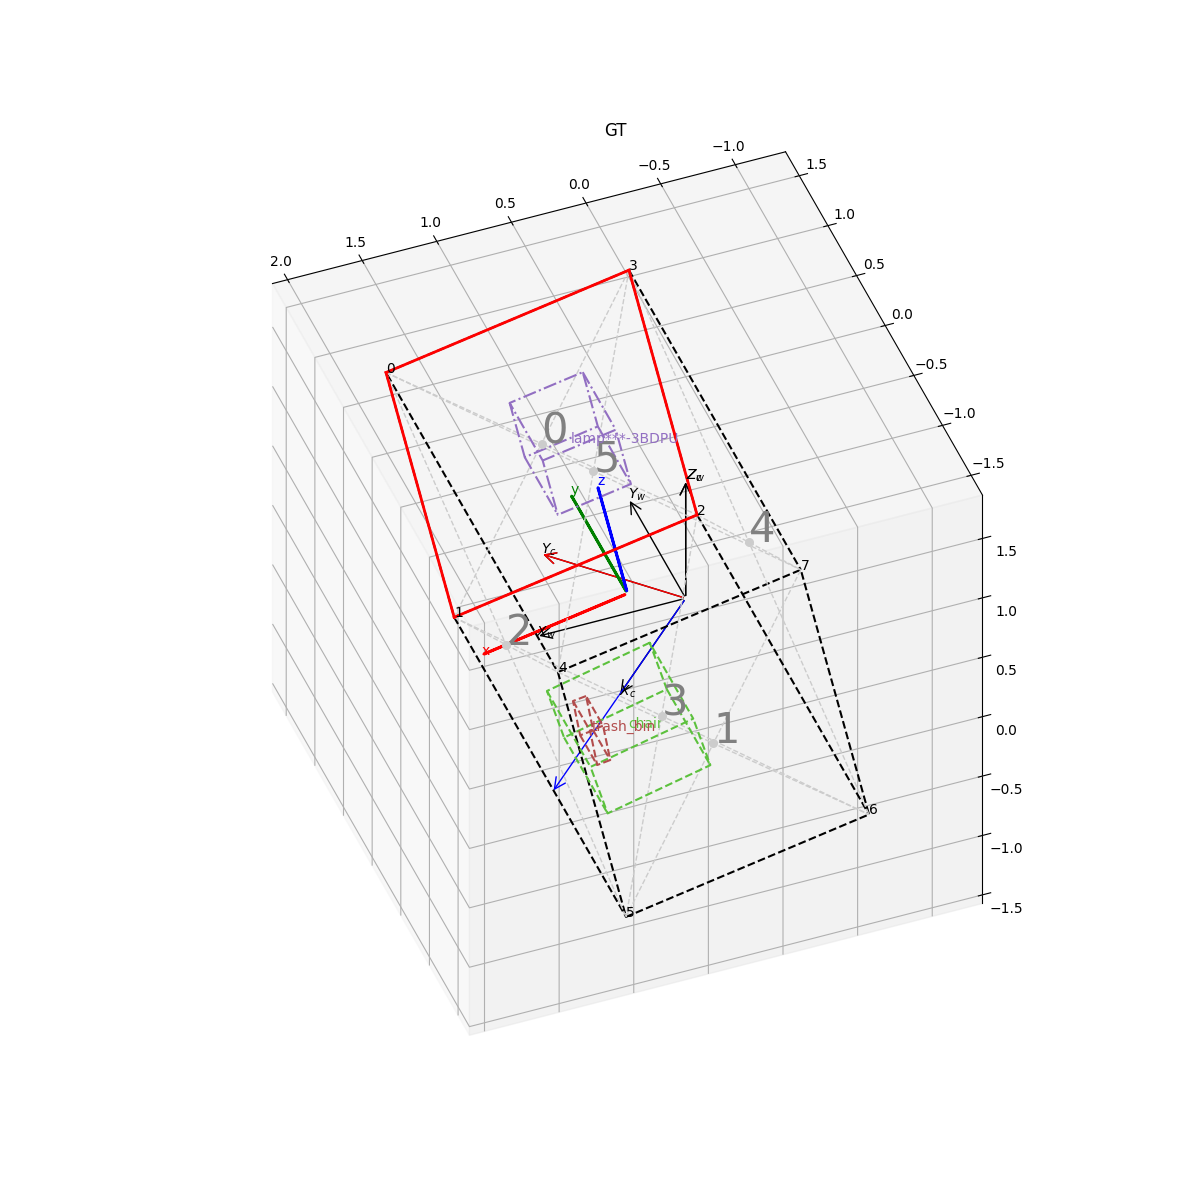

In [12]:
%matplotlib widget

fig_3d, ax_3ds_scene, _ = scene_box.draw_3D_scene_plt('GT', if_show_objs=True, hide_random_id=False, hide_cells=True)
# ax_3d = ax_3ds[0]
# ax_3d[0].view_init(elev=-46, azim=86)

# %matplotlib widget
# sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train/SimpleLayout')
# depth_combined, mask_conflict = scene_box.draw_projected_depth('GT', return_plt=True, if_save=False, save_path='', if_vis=True)

/home/ruizhu/anaconda3/envs/py38/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/ruizhu/Documents/Projects/semanticInverse/train/utils/utils_total3D/utils_rui.py:88: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


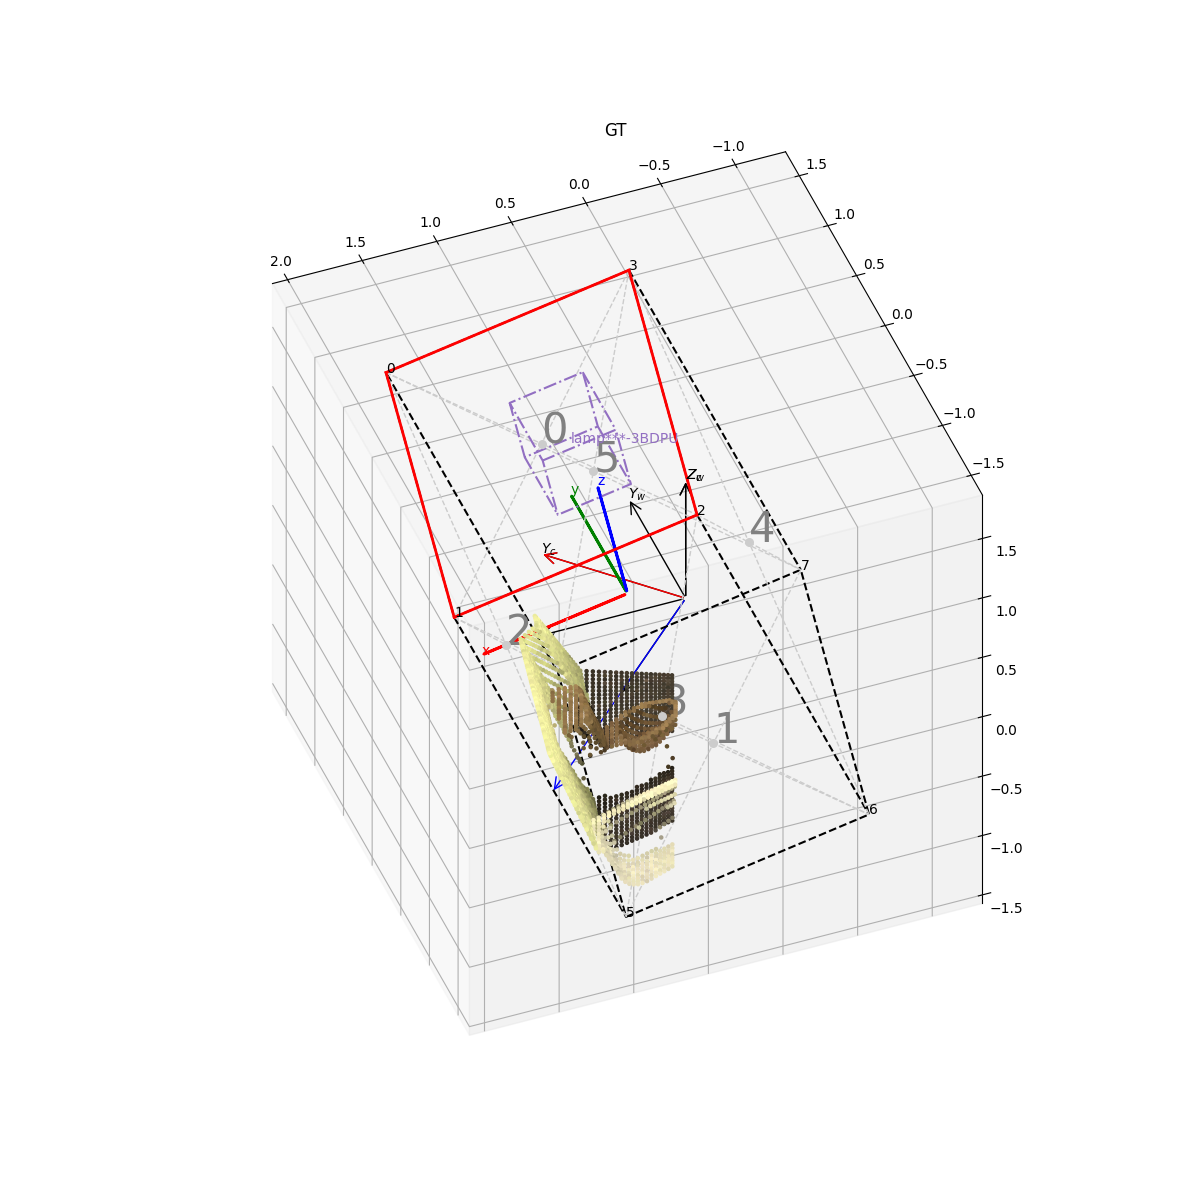

In [13]:
root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
png_file_name = 'im_%d.png'%withinsequence_id

from utils.utils_io import loadImage, loadBinary
normal_path = str(root_path / meta_split / scene_name / png_file_name).replace('im_', 'imnormal_').replace('DiffLight', '')
normal = loadImage(str(normal_path) )
normal = normal / np.sqrt(np.maximum(np.sum(normal * normal, axis=0), 1e-5) )[np.newaxis, :]
normal = normal.transpose(1, 2, 0)

depth_path = str(root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imdepth_').replace('png', 'dat'))).replace('DiffLight', '').replace('DiffMat', '')
# Read depth
depth = loadBinary(depth_path).squeeze()

scene_box = Box(rgb_img, sequence['camera']['K'], cam_R_gt, None, gt_layout, None, gt_boxes_dict, None, 'GT', None, dataset=dataset, OR='OR45', \
                depth_map=depth, normal_map=normal, 
                emitters_obj_list_gt=emitters_obj_list, emitter2wall_assign_info_list_gt=emitter2wall_assign_info_list, \
                emitter_cls_prob_PRED=np.random.random((6, grid_size**2)), emitter_cls_prob_GT=grid_prob, cell_info_grid_GT=cell_info_grid_GT, grid_size=grid_size, \
                paths={'color_file': '../train/data/openrooms/total3D_colors/OR4X_mapping_catInt_to_RGB_light.pkl'})

%matplotlib widget

fig_3d_, ax_3ds_scene_, [ax_3d_GT, ax_3d_PRED, _] = scene_box.draw_3D_scene_plt('GT', if_show_objs=False, hide_random_id=False, hide_cells=True)

points_vis, _ = scene_box.draw_point_cloud(ax_3d_GT, plot_type='GT', point_scale=5.)
# ax_3d_GT.view_init(elev=0, azim=89)


/home/ruizhu/anaconda3/envs/py38/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/ruizhu/Documents/Projects/semanticInverse/train/utils/utils_total3D/utils_rui.py:88: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


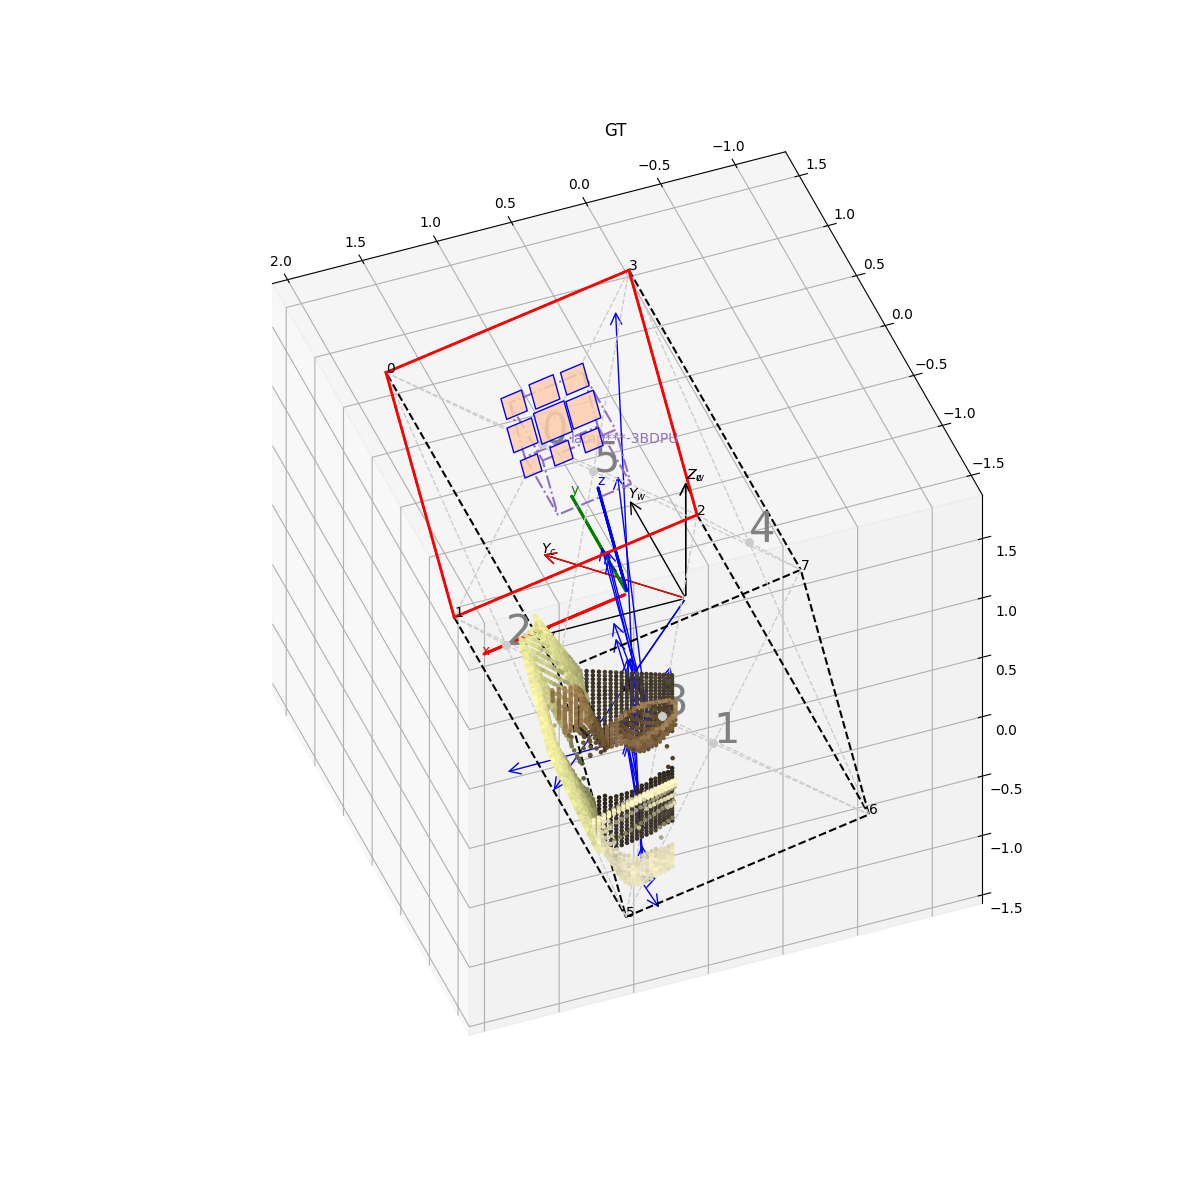

In [7]:
root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
SG_label_path = root_path / meta_split / scene_name / ('imsgEnv_%d.h5'%withinsequence_id)

from utils.utils_io import loadH5
import torch

SG_label = loadH5(SG_label_path) # (120, 160, 12, 6)
# print(SG_label.shape)
SG_label_torch = torch.from_numpy(SG_label).view(-1, 12, 6)
theta_torch, phi_torch, lamb_torch, weight_torch = torch.split(SG_label_torch, [1, 1, 1, 3], dim=2)

theta_torch = theta_torch.unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
phi_torch = phi_torch.unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
lamb_torch = lamb_torch.unsqueeze(-1).unsqueeze(-1)
weight_torch = weight_torch.unsqueeze(-1).unsqueeze(-1)

envmap_params = {'envRow': 120, 'envCol': 160, 'SGNum': 12, 'envHeight': 16, 'envWidth': 32}

normalGT_tensor = torch.from_numpy(normal).unsqueeze(0).permute(0, 3, 1, 2)

from models_def.models_light import renderingLayer
rL = renderingLayer(imWidth = envmap_params['envCol'], imHeight = envmap_params['envRow'], isCuda=False)
ls_coords, camx, camy, normalPred = rL.forwardEnv(normalGT_tensor, None, if_normal_only=True) # torch.Size([B, 128, 3, 120, 160]), [B, 3, 120, 160], [B, 3, 120, 160], [B, 3, 120, 160]
envNum = envmap_params['envRow'] * envmap_params['envCol']
camx_reshape = camx.squeeze(0).permute(1, 2, 0).view(envNum, 1, 1, 1, 1, 3)
camy_reshape = camy.squeeze(0).permute(1, 2, 0).view(envNum, 1, 1, 1, 1, 3)
camz_reshape = normalPred.squeeze(0).permute(1, 2, 0).view(envNum, 1, 1, 1, 1, 3)

axisX = torch.sin(theta_torch ) * torch.cos(phi_torch )
axisY = torch.sin(theta_torch ) * torch.sin(phi_torch )
axisZ = torch.cos(theta_torch )
axis_local_SG = torch.cat([axisX, axisY, axisZ], dim=5) # [19200, 12, 1, 1, 1, 3]; in a local SG (self.ls) coords

axis_LightNet = axis_local_SG[:, :, :, :, :, 0:1] * camx_reshape \
    + axis_local_SG[:, :, :, :, :, 1:2] * camy_reshape \
    + axis_local_SG[:, :, :, :, :, 2:3] * camz_reshape # transfer from a local camera-dependent coords to the ONE AND ONLY camera coords (LightNet)

axis_LightNet = axis_LightNet.squeeze() # [19200, 12, 3]

axis_LightNet_np = axis_LightNet.cpu().numpy().reshape(envmap_params['envRow'], envmap_params['envCol'], envmap_params['SGNum'], 3)
weight_np = weight_torch.cpu().squeeze().numpy().reshape(envmap_params['envRow'], envmap_params['envCol'], envmap_params['SGNum'], 3)

# points_vis, uu, vv

scene_box = Box(rgb_img, sequence['camera']['K'], cam_R_gt, None, gt_layout, None, gt_boxes_dict, None, 'GT', None, dataset=dataset, OR='OR45', \
                depth_map=depth, normal_map=normal, envmap_params=envmap_params, 
                emitters_obj_list_gt=emitters_obj_list, emitter2wall_assign_info_list_gt=emitter2wall_assign_info_list, \
                emitter_cls_prob_PRED=np.random.random((6, grid_size**2)), emitter_cls_prob_GT=grid_prob, cell_info_grid_GT=cell_info_grid_GT, grid_size=grid_size, \
                paths={'color_file': '../train/data/openrooms/total3D_colors/OR4X_mapping_catInt_to_RGB_light.pkl'})

%matplotlib widget

fig_3d_, ax_3ds_scene_, [ax_3d_GT, ax_3d_PRED, _] = scene_box.draw_3D_scene_plt('GT', if_show_objs=False, hide_random_id=False)

scene_box.draw_point_cloud(ax_3d_GT, plot_type='GT', point_scale=5., sample_every=10)
scene_box.draw_SG_lighting(ax_3d_GT, axis_LightNet_np, weight_np, plot_type='GT', sample_every=80)

# ax_3d_GT.view_init(elev=-60, azim=89)

# [1] Visualize per-pixel lighting

>>>>loadEnvmap /newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/mainDiffLight_xml1/scene0509_00/imenv_1.hdr
(1920, 5120, 3)
(3, 12, 16, 8, 16)


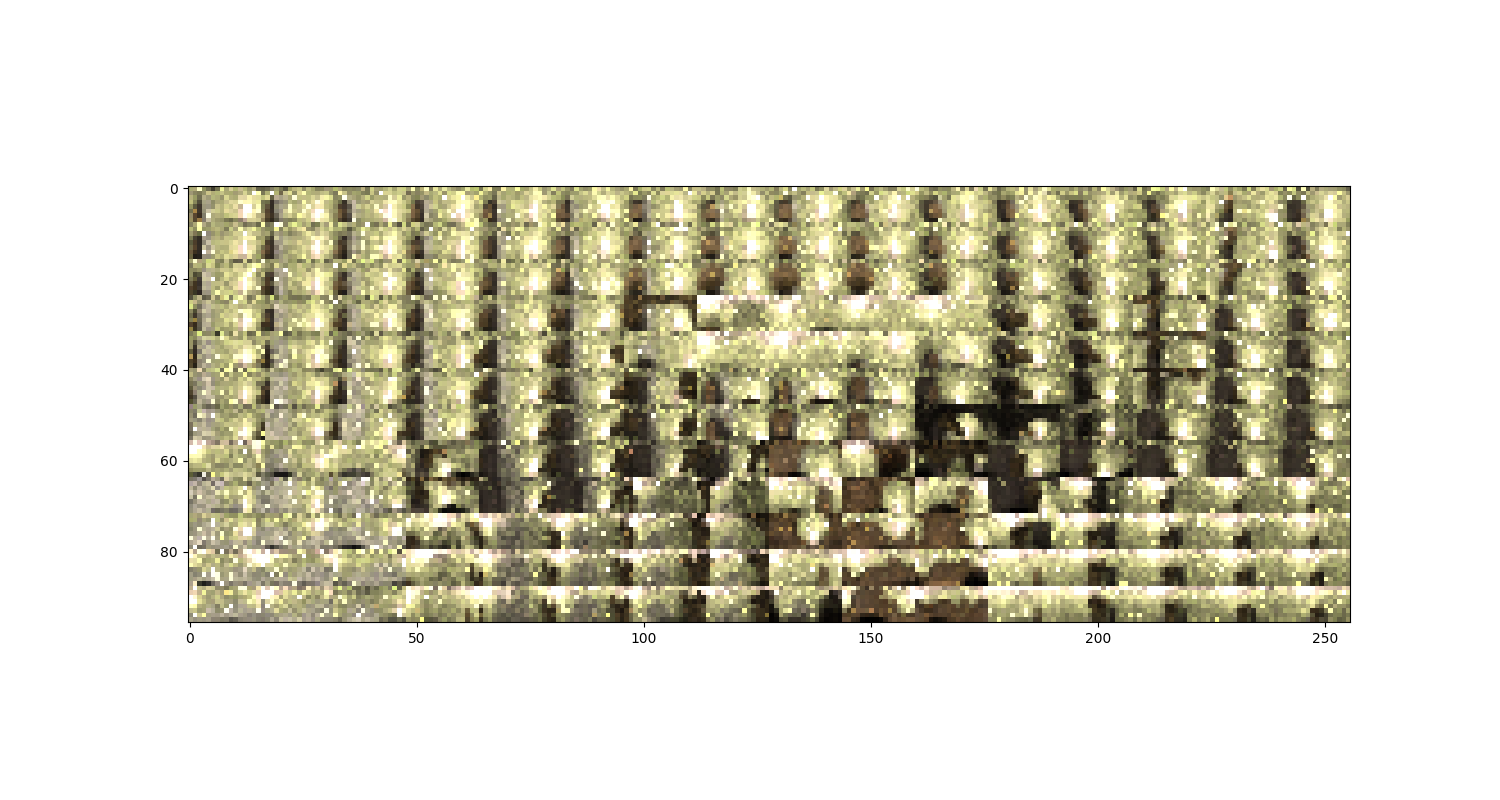

In [363]:
%reload_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os.path as osp
import numpy as np
import cv2
from skimage.measure import block_reduce 

envHeight = 8
envWidth = 16
envRow = 120
envCol = 160
SGNum = 12

from utils.utils_io import loadEnvmap, loadHdr

from pathlib import Path
# meta_split, scene_name, png_file_name = ('main_xml1', 'scene0552_00', 'im_1.png')
png_file_name = 'im_%d.png'%withinsequence_id
# meta_split, scene_name, png_file_name = ('mainDiffMat_xml1', 'scene0695_03', 'im_26.png')



root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
env_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imenv_').replace('.png', '.hdr'))

# change to direct lighting; comment 3 lines to use original envmap lighting
# env_path = str(env_path).replace('imenv', 'imenvDirect')
# envRow = 120 // 4
# envCol = 160 // 4

envmaps, envmapsInd = loadEnvmap(str(env_path), envRow, envCol, envHeight, envWidth)
envScale = 0.1

H_grid, W_grid, h, w = envmaps.shape[1:]
downsize_ratio = 10
assert H_grid % downsize_ratio == 0
assert W_grid % downsize_ratio == 0
xx, yy = np.meshgrid(np.arange(0, H_grid, downsize_ratio), np.arange(0, W_grid, downsize_ratio))
a = envmaps[:, xx.T, yy.T, :, :] * envScale
a = np.clip(a**(1.0/2.2), 0., 1.)


print(a.shape)
b = a.transpose(1, 3, 2, 4, 0).reshape(H_grid*h//downsize_ratio, W_grid*w//downsize_ratio, 3)


import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.imshow(b)
plt.show()


## rendering layer

In [364]:
import numpy as np
from PIL import Image

im_width = 320
im_height = 240
bn = 1

import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train')
import torch
from models_def.models_light import renderingLayer

# ===== adapted from forward_light(self, input_dict, return_dict_brdf)

root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
env_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imenv_').replace('.png', '.hdr'))
# envmaps, envmapsInd = loadEnvmap(str(env_path)) # too long to load from hard disk
envmapsPredImage = torch.from_numpy(envmaps).cuda().unsqueeze(0)

albedo_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imbaseColor_'))
albedo = loadImage(str(albedo_path), isGama = False)
albedo = (0.5 * (albedo + 1) ) ** 2.2

albedoPred = torch.from_numpy(albedo).cuda().unsqueeze(0)

normal_path = str(root_path / meta_split / scene_name / png_file_name).replace('im_', 'imnormal_').replace('DiffLight', '')
# normalize the normal vector so that it will be unit length
normal = loadImage(str(normal_path) )
normal = normal / np.sqrt(np.maximum(np.sum(normal * normal, axis=0), 1e-5) )[np.newaxis, :]
normalPred = torch.from_numpy(normal).cuda().unsqueeze(0)

rough_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imroughness_'))
# Read roughness
rough = loadImage(str(rough_path) )[0:1, :, :]
roughPred = torch.from_numpy(rough).cuda().unsqueeze(0)

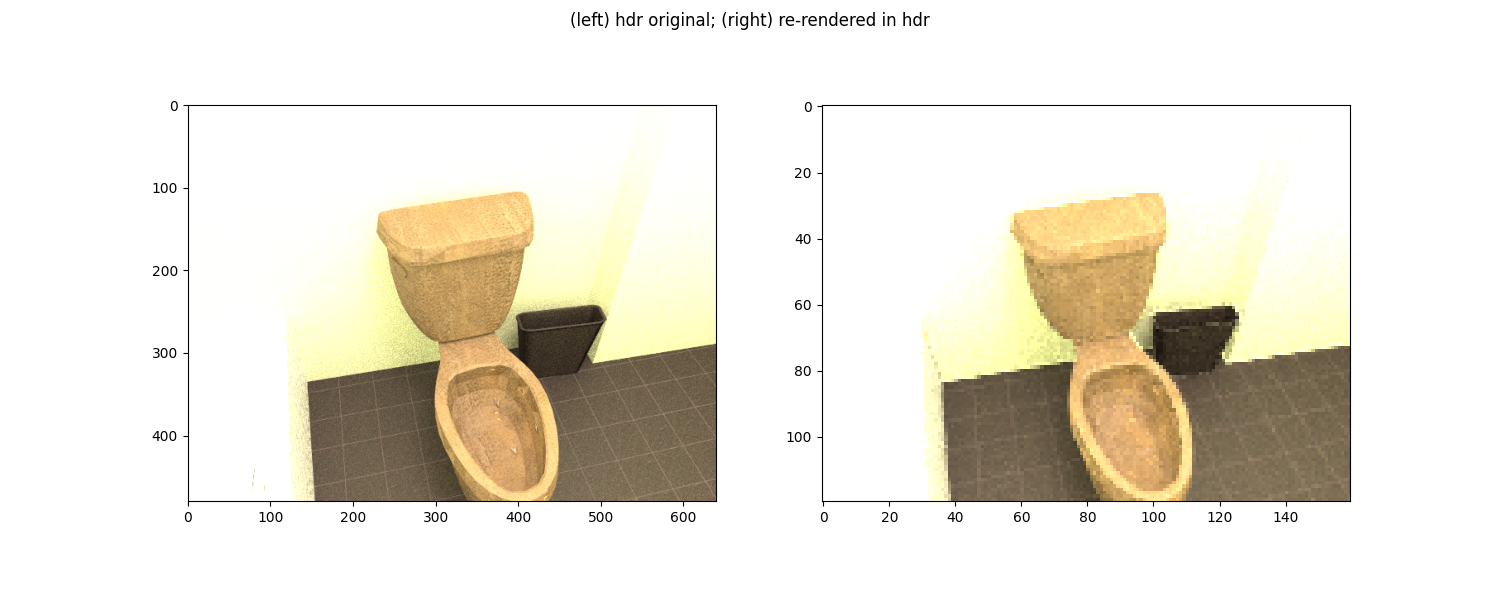

In [365]:
rL = renderingLayer(imWidth = envCol, imHeight = envRow)
diffusePred, specularPred = rL.forwardEnv(diffusePred=albedoPred.detach(), normalPred=normalPred, roughPred=roughPred, envmap=envmapsPredImage )
renderScale = 0.5
renderedImPred = torch.clamp(diffusePred * renderScale + specularPred * renderScale, 0, 1)
rendered_im = renderedImPred.cpu().squeeze().permute(1, 2, 0)

import matplotlib.pyplot as plt
hdr_path = root_path / meta_split / scene_name / (png_file_name.replace('.png', '.hdr'))
im = loadHdr(str(hdr_path))
im = im * renderScale

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(np.clip((im**(1.0/2.2)), 0., 1.))
plt.subplot(122)
plt.imshow(np.clip((rendered_im**(1.0/2.2)), 0., 1.))

fig.suptitle('(left) hdr original; (right) re-rendered in hdr')

plt.show()

## visualize depth, normal

In [366]:
print(rL.ls.shape) # hemisphere dir vector for each pixel in envmap (local coords) (8x16)
print(rL.envWeight.shape) # solid angle weight for each pixel (8x16)
print(rL.v.shape) # virtual camera plane 3D coords (x-y-z with -z forward)

torch.Size([128, 3])
torch.Size([1, 128, 1, 1, 1])
torch.Size([1, 3, 120, 160])


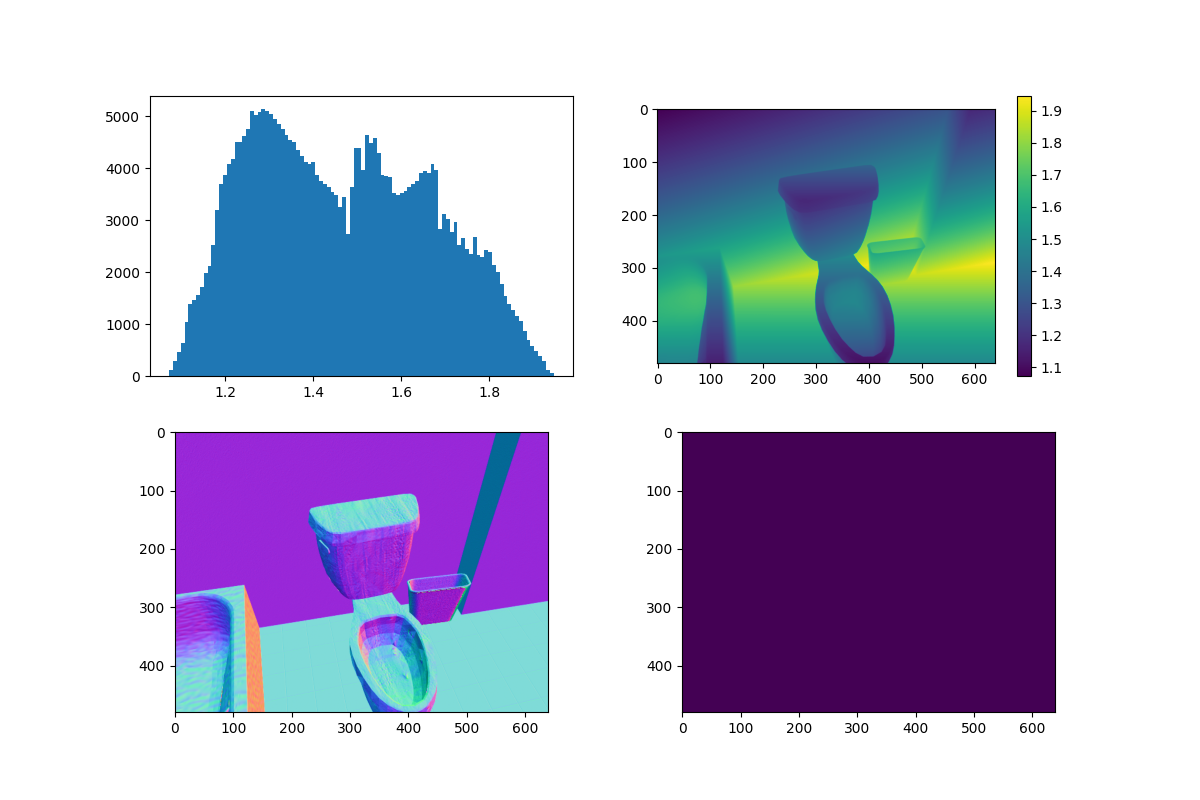

In [367]:
depth_path = str(root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imdepth_').replace('png', 'dat'))).replace('DiffLight', '').replace('DiffMat', '')
# Read depth
depth = loadBinary(depth_path).squeeze()

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.hist(depth.reshape(-1), 100)
plt.subplot(222)
plt.imshow(depth)
plt.colorbar()
plt.subplot(224)
mask = depth > 0.1
plt.imshow(mask)
plt.subplot(223)
normal_vis = normal.transpose(1, 2, 0)
normal_vis = (normal_vis + 1.)/2.
plt.imshow(normal_vis)
plt.show()

## visualize 3D geometry (LightNet)

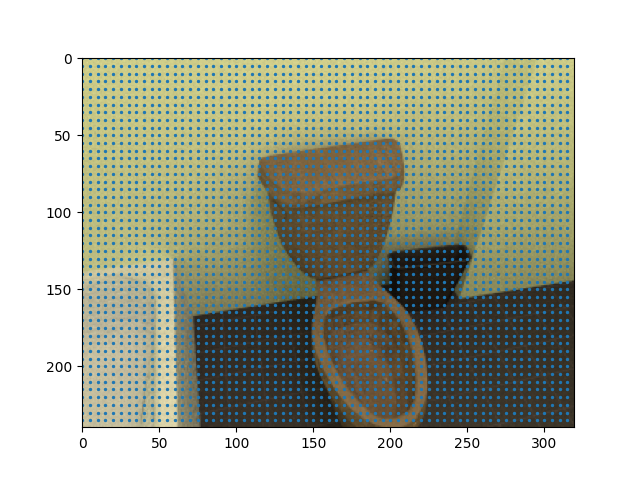

In [77]:
plt.figure()
plt.imshow(np.clip((im**(1.0/2.2)), 0., 1.))
plt.scatter(uu_subsample, vv_subsample, s=2)
plt.show()

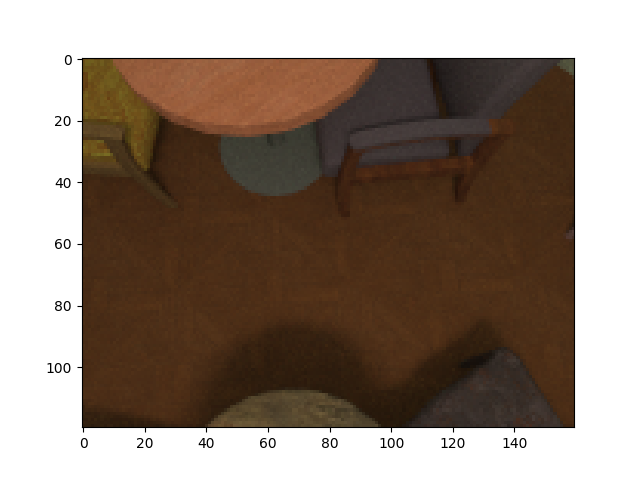

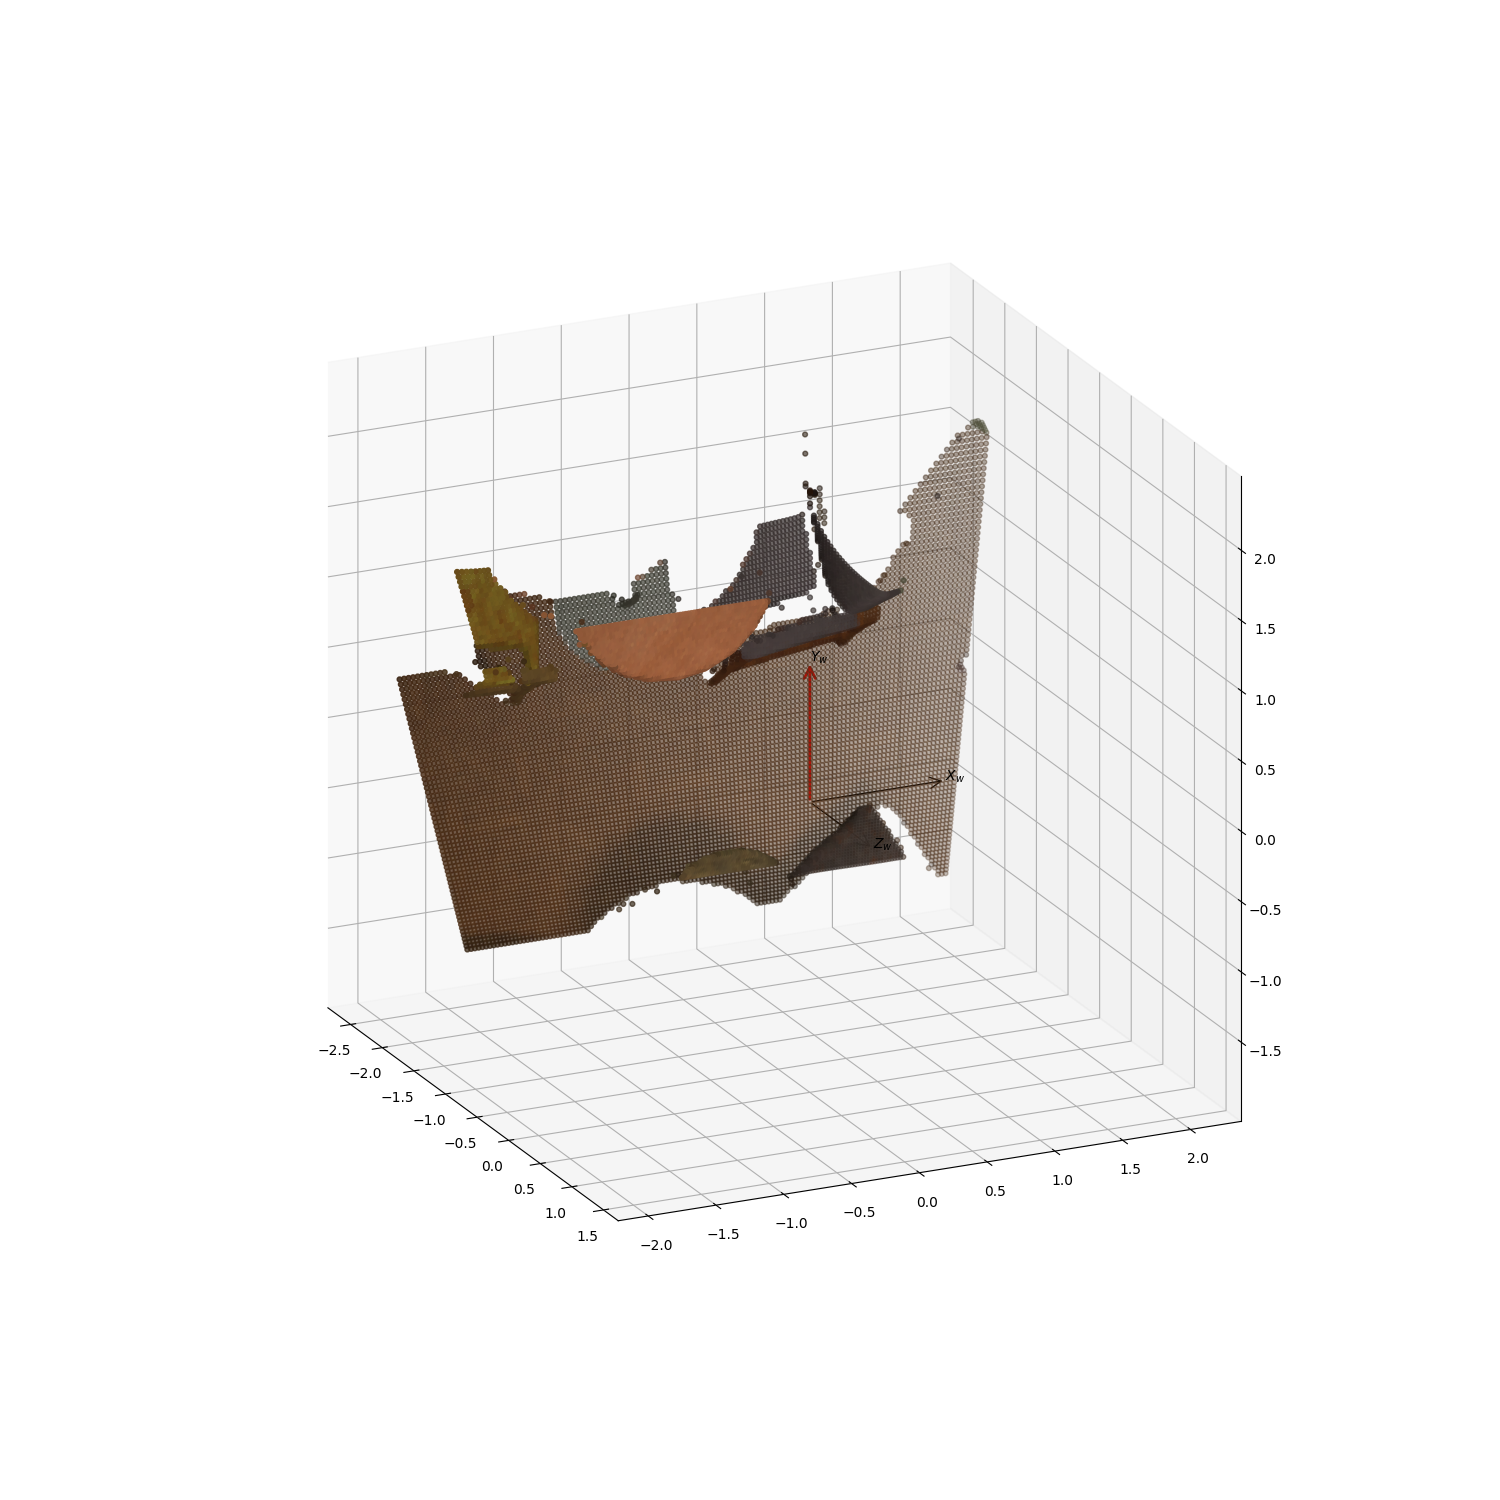

In [340]:
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/SimpleLayout')
from SimpleLayout.utils_SL_vis import vis_cube_plt, set_axes_equal, vis_axis, vis_axis_xyz, vis_index_map

im_width, im_height = 640, 480
f = 577.8708 / 2.
u0 = im_width / 2.
v0 = im_height / 2.

uu, vv = np.meshgrid(range(im_width), range(im_height))
z = -depth
x = - (uu - u0) / f * z
y = (vv - v0) / f * z
points = np.stack([x.squeeze(), y.squeeze(), z.squeeze()])

uu_subsample, vv_subsample = np.meshgrid(np.arange(0, im_width-1, 5), np.arange(0, im_height-1, 5))
points_subsample = points[:, vv_subsample, uu_subsample].reshape(3, -1)
# colors = points_subsample[2, :]
# colors[colors>-1.]=-1.
im_resized = cv2.resize(im, (envCol, envRow), interpolation=cv2.INTER_AREA )
im_resized = np.clip(im_resized**(1.0/2.2), 0., 1.)
plt.figure()
plt.imshow(im_resized)
plt.show()
lightnet_downsample_ratio = im_height//im_resized.shape[0]
assert lightnet_downsample_ratio == im_width//im_resized.shape[1]

%matplotlib widget
fig = plt.figure(figsize=(15, 15))
ax_3d = fig.add_subplot(111, projection='3d')
# ax_3d = fig.gca(projection='3d')
ax_3d.set_proj_type('ortho')
ax_3d.set_aspect("auto")

colors = im_resized[vv_subsample//lightnet_downsample_ratio, uu_subsample//lightnet_downsample_ratio, :].reshape(-1, 3)
valid_points = points_subsample[2, :] < -0.05
p = ax_3d.scatter(points_subsample[2, valid_points], points_subsample[0, valid_points], points_subsample[1, valid_points], s=12., c=colors[valid_points], cmap='jet')
# plt.colorbar(p)

vis_axis(ax_3d, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])
# ax_3d.view_init(elev=143, azim=-63)
ax_3d.set_box_aspect([1,1,1])
xyz_min = np.amin(points_subsample, 1)
xyz_max = np.amax(points_subsample, 1)
origin = np.array([0, 0, 0])
xyz_min = np.minimum(xyz_min, origin.reshape((3,)))
xyz_max = np.maximum(xyz_max, origin.reshape((3,))+1.)

new_limits = np.hstack([xyz_min.reshape((3, 1)), xyz_max.reshape((3, 1))])
set_axes_equal(ax_3d, limits=new_limits[[2, 0, 1], :]) # IMPORTANT - this is also required
# ax_3d.axes.set_xlim3d(left=new_limits[2][0], right=new_limits[2][1])
# ax_3d.axes.set_ylim3d(bottom=new_limits[0][0], top=new_limits[0][1]) 
# ax_3d.axes.set_zlim3d(bottom=new_limits[1][0], top=new_limits[1][1])

# set_axes_equal(ax_3d) # IMPORTANT - this is also required


ax_3d.view_init(elev=20, azim=-25)
# ax_3d.view_init(elev=0, azim=0)


# visualize SG params

/home/ruizhu/anaconda3/envs/py38/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


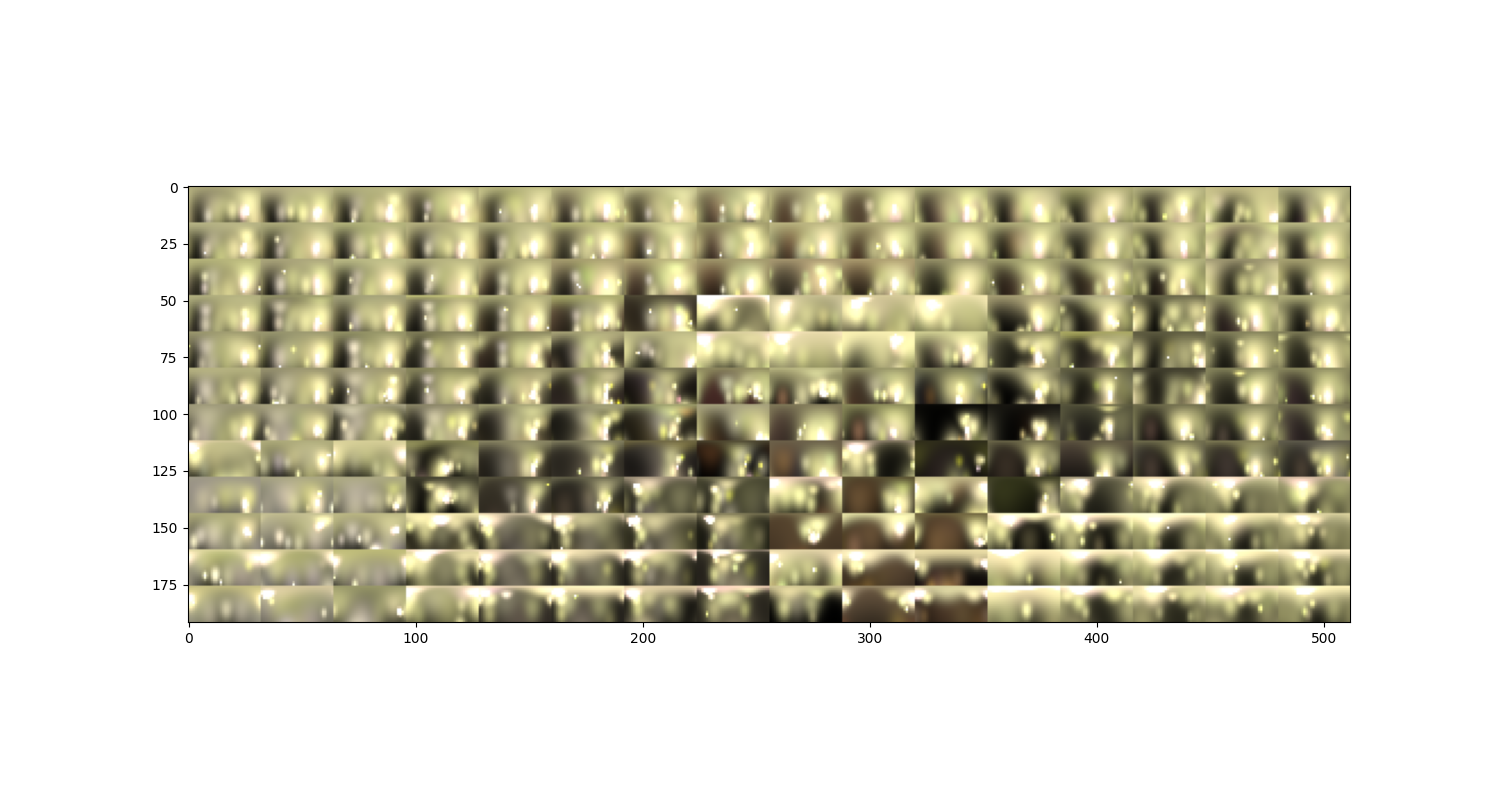

In [368]:
root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
SG_label_path = root_path / meta_split / scene_name / ('imsgEnv_%d.h5'%withinsequence_id)

from utils.utils_io import loadH5
import torch

SG_label = loadH5(SG_label_path) # (120, 160, 12, 6)

# sg_single = SG_label[0, 0]
# theta, phi, lamb, weight = np.split(sg_single[0], [1, 2, 3])

SG_label_torch = torch.from_numpy(SG_label).cuda().view(-1, 12, 6)
theta_torch, phi_torch, lamb_torch, weight_torch = torch.split(SG_label_torch, [1, 1, 1, 3], dim=2)
# [!!!] the GT SG axes are in a camera-dependent local coords

import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/third_parties_outside/SphericalGaussianOptimization')

import SGOptim

envRow = 120
envCol = 160
SGNum = 12
envHeight = 16
envWidth = 32

envNum = envRow * envCol

envOptim1 = SGOptim.SGEnvOptim(
    envNum = envNum,
    envWidth = envWidth,
    envHeight = envHeight,
    niter = 10, )


theta_torch = theta_torch.unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
phi_torch = phi_torch.unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
lamb_torch = lamb_torch.unsqueeze(-1).unsqueeze(-1)
weight_torch = weight_torch.unsqueeze(-1).unsqueeze(-1)

# transform_axes_list = [camx.permute(1, 2, 0).view(-1, 3), camy.permute(1, 2, 0).view(-1, 3), normalPred.permute(1, 2, 0).view(-1, 3)]
recImage_GT = envOptim1.renderSG(theta_torch, phi_torch, lamb_torch, weight_torch) # [19200, 3, 8, 16]
# recImage = envOptim1.renderSG(theta_torch, phi_torch, lamb_torch, weight_torch, transform_axes_list=transform_axes_list) # [19200, 3, 8, 16]

recImage_GT = recImage_GT.view(envRow, envCol, 3, envHeight, envWidth).permute(2, 0, 1, 3, 4) # [3, 120, 160, 8, 16]
recImage_np_GT = recImage_GT.cpu().numpy()

H_grid, W_grid, h, w = recImage_GT.shape[1:]

a = recImage_np_GT[:, xx.T, yy.T, :, :] * envScale
a = np.clip(a**(1.0/2.2), 0., 1.)
b = a.transpose(1, 3, 2, 4, 0).reshape(H_grid*h//downsize_ratio, W_grid*w//downsize_ratio, 3)

plt.figure(figsize=(15, 8))
plt.imshow(b)
plt.show()

In [344]:
# normal_path = root_path / meta_split / scene_name / ('imnormal_%d.png'%withinsequence_id)
# from utils.utils_io import loadImage
# normalGT = loadImage(str(normal_path).replace('DiffLight', '').replace('DiffMat', ''), resize_HW=[240, 320])

normalGT_tensor = torch.from_numpy(normal).cuda().unsqueeze(0)
envmaps_GT_tensor = torch.from_numpy(envmaps).cuda().unsqueeze(0)

from models_def.models_light import renderingLayer
rL = renderingLayer(imWidth = envCol, imHeight = envRow)
ls_coords, camx, camy, normalPred = rL.forwardEnv(normalGT_tensor, envmaps_GT_tensor, if_normal_only=True) # torch.Size([B, 128, 3, 120, 160]), [B, 3, 120, 160], [B, 3, 120, 160], [B, 3, 120, 160]
camx_reshape = camx.squeeze(0).permute(1, 2, 0).view(envNum, 1, 1, 1, 1, 3)
camy_reshape = camy.squeeze(0).permute(1, 2, 0).view(envNum, 1, 1, 1, 1, 3)
camz_reshape = normalPred.squeeze(0).permute(1, 2, 0).view(envNum, 1, 1, 1, 1, 3)

train_test_data_path = '/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data'
transform_to_total3d_coords_dict_path = Path(train_test_data_path) / meta_split / scene_name / ('transform_to_total3d_coords_dict_%d.pkl'%withinsequence_id)
import pickle5 as pickle
with open(transform_to_total3d_coords_dict_path, 'rb') as f:
    transform_to_total3d_coords_dict = pickle.load(f)
transform_R, transform_t = transform_to_total3d_coords_dict['transform_R'], transform_to_total3d_coords_dict['transform_t']
transform_R_torch = torch.from_numpy(transform_R).cuda().float()
transform_t_torch = torch.from_numpy(transform_t).cuda().float()

# -------- ==> single envmap in global coords

axisX = torch.sin(theta_torch ) * torch.cos(phi_torch )
axisY = torch.sin(theta_torch ) * torch.sin(phi_torch )
axisZ = torch.cos(theta_torch )
axis_local_SG = torch.cat([axisX, axisY, axisZ], dim=5) # [19200, 12, 1, 1, 1, 3]; in a local SG (self.ls) coords

axis_LightNet = axis_local_SG[:, :, :, :, :, 0:1] * camx_reshape \
    + axis_local_SG[:, :, :, :, :, 1:2] * camy_reshape \
    + axis_local_SG[:, :, :, :, :, 2:3] * camz_reshape # transfer from a local camera-dependent coords to the ONE AND ONLY camera coords (LightNet)

axis_LightNet = axis_LightNet.squeeze() # [19200, 12, 3]

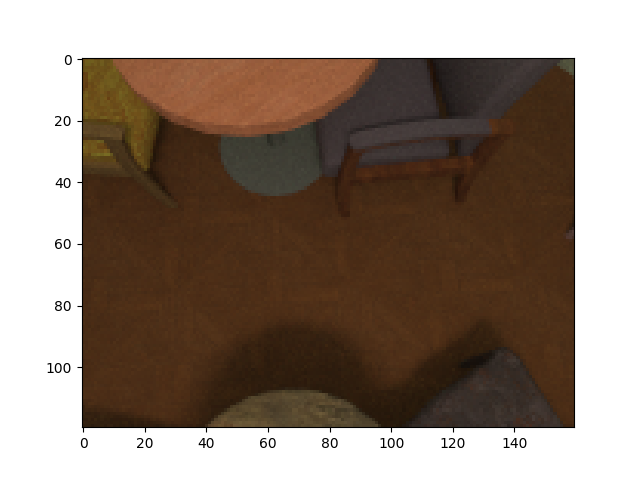

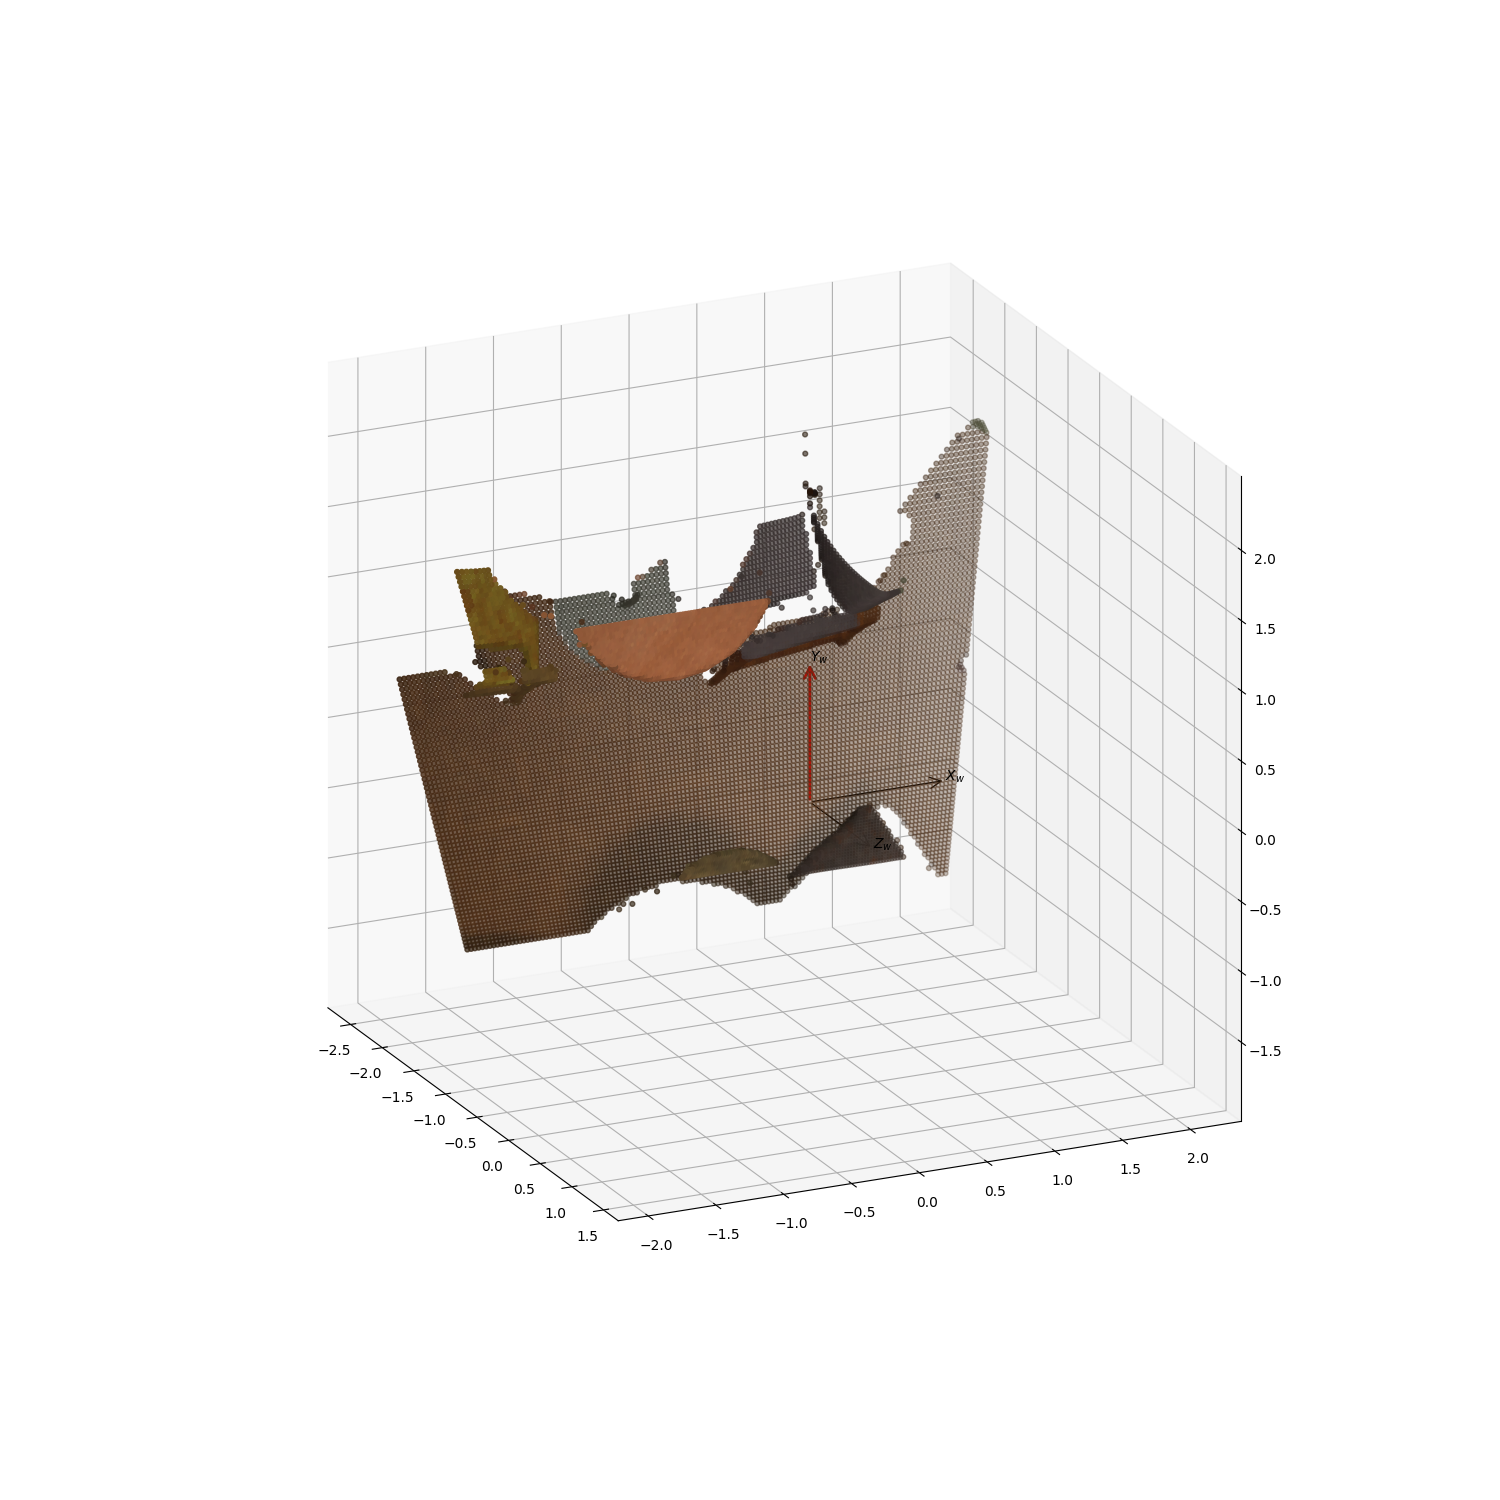

In [349]:
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/SimpleLayout')
from SimpleLayout.utils_SL_vis import vis_cube_plt, set_axes_equal, vis_axis, vis_axis_xyz, vis_index_map

uu_subsample, vv_subsample = np.meshgrid(np.arange(0, im_width-1, 5), np.arange(0, im_height-1, 5))
points_subsample = points[:, vv_subsample, uu_subsample].reshape(3, -1)
# colors = points_subsample[2, :]
# colors[colors>-1.]=-1.
im_resized = cv2.resize(im, (envCol, envRow), interpolation=cv2.INTER_AREA )
im_resized = np.clip(im_resized**(1.0/2.2), 0., 1.)
plt.figure()
plt.imshow(im_resized)
plt.show()
lightnet_downsample_ratio = im_height//im_resized.shape[0]
assert lightnet_downsample_ratio == im_width//im_resized.shape[1]

%matplotlib widget
fig = plt.figure(figsize=(15, 15))
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d.set_proj_type('ortho')
ax_3d.set_aspect("auto")

colors = im_resized[vv_subsample//lightnet_downsample_ratio, uu_subsample//lightnet_downsample_ratio, :].reshape(-1, 3)
valid_points = points_subsample[2, :] < -0.05
p = ax_3d.scatter(points_subsample[2, valid_points], points_subsample[0, valid_points], points_subsample[1, valid_points], s=12., c=colors[valid_points], cmap='jet')
# plt.colorbar(p)

vis_axis(ax_3d, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])
# ax_3d.view_init(elev=143, azim=-63)
ax_3d.set_box_aspect([1,1,1])
xyz_min = np.amin(points_subsample, 1)
xyz_max = np.amax(points_subsample, 1)
origin = np.array([0, 0, 0])
xyz_min = np.minimum(xyz_min, origin.reshape((3,)))
xyz_max = np.maximum(xyz_max, origin.reshape((3,))+1.)

new_limits = np.hstack([xyz_min.reshape((3, 1)), xyz_max.reshape((3, 1))])
set_axes_equal(ax_3d, limits=new_limits[[2, 0, 1], :]) # IMPORTANT - this is also required
# ax_3d.axes.set_xlim3d(left=new_limits[2][0], right=new_limits[2][1])
# ax_3d.axes.set_ylim3d(bottom=new_limits[0][0], top=new_limits[0][1]) 
# ax_3d.axes.set_zlim3d(bottom=new_limits[1][0], top=new_limits[1][1])

# set_axes_equal(ax_3d) # IMPORTANT - this is also required


ax_3d.view_init(elev=20, azim=-25)
# ax_3d.view_init(elev=0, azim=0)


![](https://i.imgur.com/24QtrDE.jpg)

In [350]:
axis_LightNet_np = axis_LightNet.cpu().numpy().reshape(envRow, envCol, SGNum, 3)
weight_np = weight_torch.cpu().squeeze().numpy().reshape(envRow, envCol, SGNum, 3)

# print(axis_LightNet_np.shape, weight_np.shape)

# insertion_uv = [50, 50]

for i in range(0, im_width, 40):
    for j in range(0, im_height, 40):
        insertion_uv = [i, j]
        ii, jj = insertion_uv[1]//4, insertion_uv[0]//4
        
#         print(i, j, ii, jj)
        axis_LightNet_show = axis_LightNet_np[ii, jj] # at half res
        origin_LightNet_show = points[:, insertion_uv[1], insertion_uv[0]]
        weight_show = np.linalg.norm(weight_np[ii, jj], axis=1)
        # print(weight_show.shape)

        from utils.utils_total3D.utils_rui import vis_axis_xyz, Arrow3D, vis_axis, vis_cube_plt
        for weight_single, axis_single in zip(weight_show, axis_LightNet_show):
            weight_single_vis = weight_single / 200.
#             print(weight_single_vis)

            a = Arrow3D([origin_LightNet_show[2], origin_LightNet_show[2]+axis_single[2]*weight_single_vis], 
                        [origin_LightNet_show[0], origin_LightNet_show[0]+axis_single[0]*weight_single_vis], 
                        [origin_LightNet_show[1], origin_LightNet_show[1]+axis_single[1]*weight_single_vis], \
                        mutation_scale=20, lw=1, arrowstyle="->", color="b")
            ax_3d.add_artist(a)
